In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl

from sklearn.preprocessing import StandardScaler
from sklearn. model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier # 분류 GradientBoosting
from lightgbm import LGBMClassifier

from lightgbm import plot_importance

from sklearn.tree import export_graphviz
import graphviz
from subprocess import call
from IPython.display import Image

import seaborn as sns
%matplotlib inline
from statsmodels.api import Logit

import math
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import export_graphviz
import graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from subprocess import call
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus=False)

In [27]:
df_2021_sales_raw = pd.read_csv("../cvs_data/data_result/2021_sales_raw.csv")
df_2021_sales = df_2021_sales_raw[['idUser', 'SalesDT', 'ItemId', 'ItemIdLarge', 'ItemNameLarge', 'ItemIdMiddle', 'ItemNameMiddle', 'Price']]

In [28]:
df_2021_sales.groupby(['ItemIdLarge','ItemIdMiddle'])['Price'].agg('sum')

ItemIdLarge  ItemIdMiddle
L1           M1               29093100
             M2               22853400
             M3               10269000
L2           M1                7812100
             M2                3568700
             M3                2107400
L3           M1               48432500
             M2               60792550
             M3               39399400
L4           M1               73636300
L5           M1              162427580
             M2               73307500
             M3              126867220
L6           M1               68617400
             M2                5197700
             M3               14543160
Name: Price, dtype: int64

In [29]:
df_cat_priceSum_2021 = pd.DataFrame(df_2021_sales.groupby(['ItemNameLarge','ItemNameMiddle'])['Price'].agg('sum'))
df_cat_priceSum_2021

Price
ItemNameLarge ItemNameMiddle           
간편식사          도시락              29093100
              샌드위치             22853400
              주먹밥              10269000
과자류           껌/초              39399400
              빵/디              60792550
              스낵               48432500
식품            가공식             162427580
              식재료             126867220
              안주류              73307500
아이스크          아이스              73636300
음료            아이스               5197700
              유제품              14543160
              음료               68617400
즉석조리          베이커               3568700
              즉석커               2107400
              튀김류               7812100

In [30]:
df_cat_priceSum_2021.index = [large+'_'+middle for large, middle in df_cat_priceSum_2021.index]
df_cat_priceSum_2021

,Price
간편식사_도시락,29093100
간편식사_샌드위치,22853400
간편식사_주먹밥,10269000
과자류_껌/초,39399400
과자류_빵/디,60792550
과자류_스낵,48432500
식품_가공식,162427580
식품_식재료,126867220
식품_안주류,73307500
아이스크_아이스,73636300


<Figure size 1000x600 with 0 Axes>

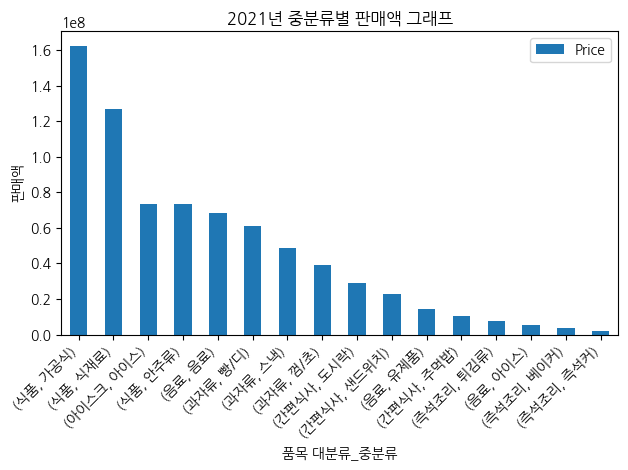

In [81]:
ax = plt.figure(figsize=(10, 6))
bars = df_cat_priceSum_2021.sort_values(by='Price', ascending=False).plot.bar()
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('판매액')
plt.xlabel('품목 대분류_중분류')
plt.title('2021년 중분류별 판매액 그래프')
plt.tight_layout()

# for bar, value in zip(bars,\
#                       sum(df_cat_priceSum.sort_values(by='Price', ascending=False).values.tolist(), [])):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), 
#              ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [31]:
df_2022_sales_raw = pd.read_csv("../cvs_data/data_result/2022_sales_raw.csv")
df_2022_sales = df_2022_sales_raw[['idUser', 'SalesDT', 'ItemId', 'ItemIdLarge', 'ItemNameLarge', 'ItemIdMiddle', 'ItemNameMiddle', 'Price']]

In [32]:
df_2022_sales.groupby(['ItemIdLarge','ItemIdMiddle'])['Price'].agg('sum')

ItemIdLarge  ItemIdMiddle
L1           M1               31429000
             M2               24377500
             M3               11085200
L2           M1                8931800
             M2                3791300
             M3                2793500
L3           M1               53012000
             M2               66053650
             M3               42998050
L4           M1               90050100
L5           M1              176082300
             M2               78503900
             M3              142898610
L6           M1               75466850
             M2                5984600
             M3               15751230
Name: Price, dtype: int64

In [33]:
df_cat_priceSum_2022 = pd.DataFrame(df_2022_sales.groupby(['ItemNameLarge','ItemNameMiddle'])['Price'].agg('sum'))
df_cat_priceSum_2022

Price
ItemNameLarge ItemNameMiddle           
간편식사          도시락              31429000
              샌드위치             24377500
              주먹밥              11085200
과자류           껌/초              42998050
              빵/디              66053650
              스낵               53012000
식품            가공식             176082300
              식재료             142898610
              안주류              78503900
아이스크          아이스              90050100
음료            아이스               5984600
              유제품              15751230
              음료               75466850
즉석조리          베이커               3791300
              즉석커               2793500
              튀김류               8931800

In [34]:
df_cat_priceSum_2022.index = [large+'_'+middle for large, middle in df_cat_priceSum_2022.index]
df_cat_priceSum_2022

,Price
간편식사_도시락,31429000
간편식사_샌드위치,24377500
간편식사_주먹밥,11085200
과자류_껌/초,42998050
과자류_빵/디,66053650
과자류_스낵,53012000
식품_가공식,176082300
식품_식재료,142898610
식품_안주류,78503900
아이스크_아이스,90050100


<Figure size 1000x600 with 0 Axes>

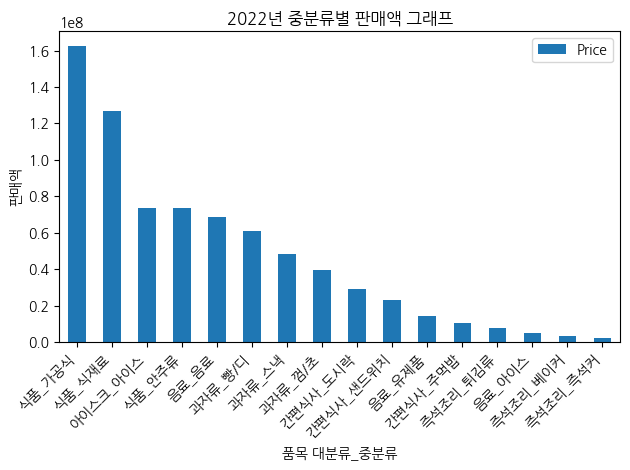

In [13]:
ax = plt.figure(figsize=(10, 6))
bars = df_cat_priceSum_2022.sort_values(by='Price', ascending=False).plot.bar()
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('판매액')
plt.xlabel('품목 대분류_중분류')
plt.title('2022년 중분류별 판매액 그래프')
plt.tight_layout()

plt.show()

In [83]:
df_cat_priceSum = pd.concat([df_cat_priceSum_2021.T, df_cat_priceSum_2022.T]).T
df_cat_priceSum.columns=['2021','2022']

<Figure size 10000x3000 with 0 Axes>

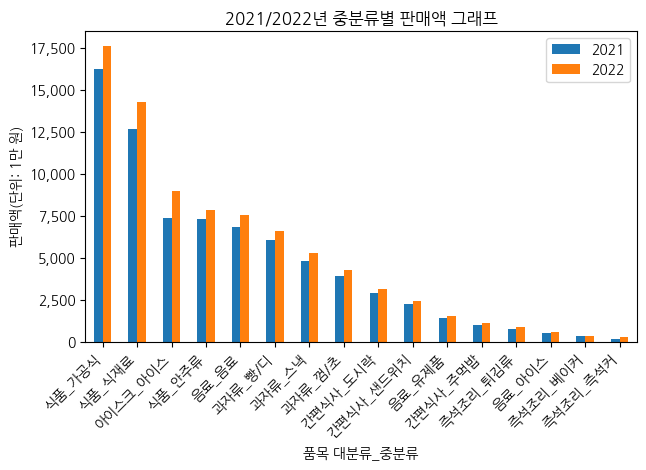

In [85]:
plt.figure(figsize=(100, 30))
df_cat_priceSum['sum'] = df_cat_priceSum['2021']+df_cat_priceSum['2022']
df_cat_priceSum = df_cat_priceSum.sort_values(by='sum', ascending=False)
ax=df_cat_priceSum[['2021','2022']].plot(kind='bar')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('판매액(단위: 1만 원)')
plt.xlabel('품목 대분류_중분류')
plt.title('2021/2022년 중분류별 판매액 그래프')
plt.tight_layout()

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x//10000) for x in current_values])

plt.show()
# for p in ax.patches:
#     left, bottom, width, height = p.get_bbox().bounds
#     ax.annotate("%.2f"%(height/1e2), (left+width/2, height*1.01), ha='center', rotation=45)

,2021,2022
간편식사_도시락,6084,6533
간편식사_샌드위치,7523,8023
간편식사_주먹밥,5471,5890
과자류_껌/초,19711,21661
과자류_빵/디,23847,26037
과자류_스낵,22611,24777
식품_가공식,43247,46587
식품_식재료,30903,33980
식품_안주류,17803,19106
아이스크_아이스,14773,17954


<Figure size 10000x3000 with 0 Axes>

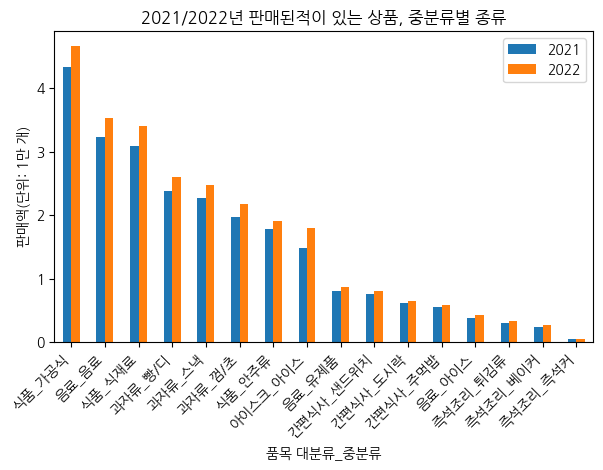

In [110]:
df_cat_count_2021 = df_2021_sales.groupby(['ItemNameLarge','ItemNameMiddle'])['Price'].size()
df_cat_count_2021.index = [large+'_'+middle for large, middle in df_cat_count_2021.index]
# df_cat_count_2021.sort_values(ascending=False).plot.bar()

df_cat_count_2022 = df_2022_sales.groupby(['ItemNameLarge','ItemNameMiddle'])['Price'].size()
df_cat_count_2022.index = [large+'_'+middle for large, middle in df_cat_count_2022.index]
# df_cat_count_2022.sort_values(ascending=False).plot.bar()

df_cat_count = pd.DataFrame([df_cat_count_2021, df_cat_count_2022]).T
df_cat_count.columns=['2021','2022']
display(df_cat_count)

plt.figure(figsize=(100, 30))
df_cat_count['sum'] = df_cat_count['2021']+df_cat_count['2022']
df_cat_count = df_cat_count.sort_values(by='sum', ascending=False)
ax=df_cat_count[['2021','2022']].plot(kind='bar')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('판매액(단위: 1만 개)')
plt.xlabel('품목 대분류_중분류')
plt.title('2021/2022년 판매된적이 있는 상품, 중분류별 종류')
plt.tight_layout()

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x//10000) for x in current_values])

plt.show()

,2021,2022
간편식사_도시락,4500.0,4500.0
간편식사_샌드위치,3000.0,3000.0
간편식사_주먹밥,1500.0,1700.0
과자류_껌/초,1500.0,1500.0
과자류_빵/디,2200.0,2200.0
과자류_스낵,1500.0,1500.0
식품_가공식,3500.0,3500.0
식품_식재료,3400.0,3500.0
식품_안주류,3500.0,3500.0
아이스크_아이스,2500.0,2500.0


<Figure size 10000x3000 with 0 Axes>

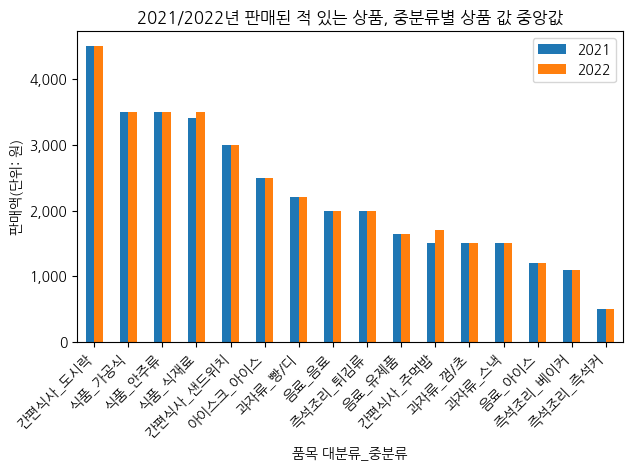

In [116]:
df_cat_count_2021 = df_2021_sales.groupby(['ItemNameLarge','ItemNameMiddle'])['Price'].agg('median')
df_cat_count_2021.index = [large+'_'+middle for large, middle in df_cat_count_2021.index]
# df_cat_count_2021.sort_values(ascending=False).plot.bar()

df_cat_count_2022 = df_2022_sales.groupby(['ItemNameLarge','ItemNameMiddle'])['Price'].agg('median')
df_cat_count_2022.index = [large+'_'+middle for large, middle in df_cat_count_2022.index]
# df_cat_count_2022.sort_values(ascending=False).plot.bar()

df_cat_count = pd.DataFrame([df_cat_count_2021, df_cat_count_2022]).T
df_cat_count.columns=['2021','2022']
display(df_cat_count)

plt.figure(figsize=(100, 30))
df_cat_count['sum'] = df_cat_count['2021']+df_cat_count['2022']
df_cat_count = df_cat_count.sort_values(by='sum', ascending=False)
ax=df_cat_count[['2021','2022']].plot(kind='bar')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('판매액(단위: 원)')
plt.xlabel('품목 대분류_중분류')
plt.title('2021/2022년 판매된 적 있는 상품, 중분류별 상품 값 중앙값')
plt.tight_layout()

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()

,2021,2022
간편식사_도시락,4781.903353,4810.806674
간편식사_샌드위치,3037.804068,3038.451951
간편식사_주먹밥,1876.987754,1882.037351
과자류_껌/초,1998.853432,1985.044550
과자류_빵/디,2549.274542,2536.914775
과자류_스낵,2141.988413,2139.564919
식품_가공식,3755.811501,3779.644536
식품_식재료,4105.336699,4205.374044
식품_안주류,4117.704881,4108.861091
아이스크_아이스,4984.519055,5015.600980


<Figure size 10000x3000 with 0 Axes>

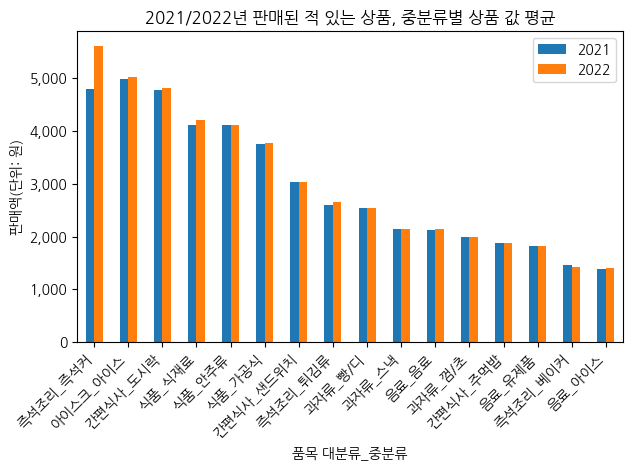

In [117]:
df_cat_count_2021 = df_2021_sales.groupby(['ItemNameLarge','ItemNameMiddle'])['Price'].agg('mean')
df_cat_count_2021.index = [large+'_'+middle for large, middle in df_cat_count_2021.index]
# df_cat_count_2021.sort_values(ascending=False).plot.bar()

df_cat_count_2022 = df_2022_sales.groupby(['ItemNameLarge','ItemNameMiddle'])['Price'].agg('mean')
df_cat_count_2022.index = [large+'_'+middle for large, middle in df_cat_count_2022.index]
# df_cat_count_2022.sort_values(ascending=False).plot.bar()

df_cat_count = pd.DataFrame([df_cat_count_2021, df_cat_count_2022]).T
df_cat_count.columns=['2021','2022']
display(df_cat_count)

plt.figure(figsize=(100, 30))
df_cat_count['sum'] = df_cat_count['2021']+df_cat_count['2022']
df_cat_count = df_cat_count.sort_values(by='sum', ascending=False)
ax=df_cat_count[['2021','2022']].plot(kind='bar')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('판매액(단위: 원)')
plt.xlabel('품목 대분류_중분류')
plt.title('2021/2022년 판매된 적 있는 상품, 중분류별 상품 값 평균')
plt.tight_layout()

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()